# Titanic Survival Prediction – Data Analysis Project

## 1. Problem Statement
The Titanic disaster is one of the most famous shipwrecks in history.  
This project aims to analyze passenger data to understand which factors influenced survival and to prepare a clean dataset for machine learning modeling.

---

## 2. Objectives
- To understand the structure and quality of the Titanic dataset  
- To handle missing and duplicate values  
- To perform exploratory data analysis (EDA)  
- To identify important factors affecting survival  
- To engineer new features for machine learning

---

## 3. Data Understanding
In this section, we explore the dataset using info(), describe(), and check missing values.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\Anshuman\Desktop\ANSHUMAN\Placements Ready Work\Machine learning\Datasets\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Numeric
df["Age"].fillna(df["Age"].median(), inplace=True)

# Categorical
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


## 4. Data Cleaning
Handling missing values, removing duplicates, and preparing data for analysis.


In [7]:
# Duplicate Values
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.groupby("Survived").mean(numeric_only=True)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.291433,0.473684,0.464912,48.395408


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Exploratory Data Analysis (EDA)
Visual analysis to understand patterns and relationships in the dataset.


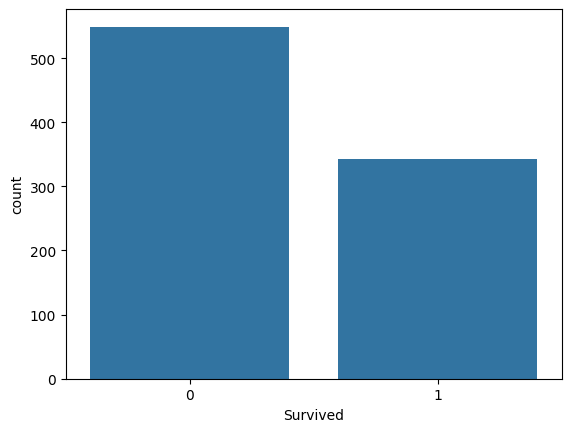

In [10]:
Survived=sns.countplot(x="Survived", data=df)

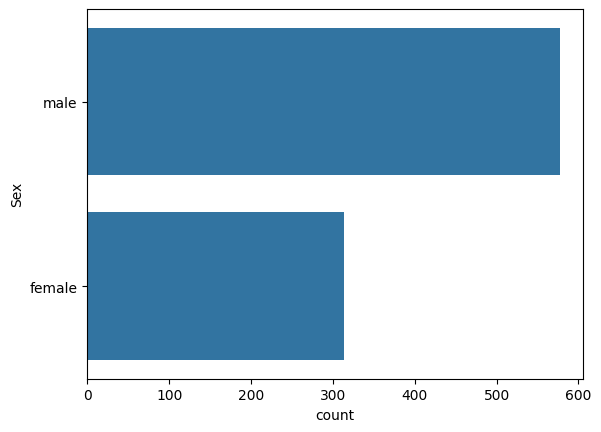

In [11]:
Sex=sns.countplot(y="Sex",data=df)

<Axes: xlabel='Age', ylabel='Count'>

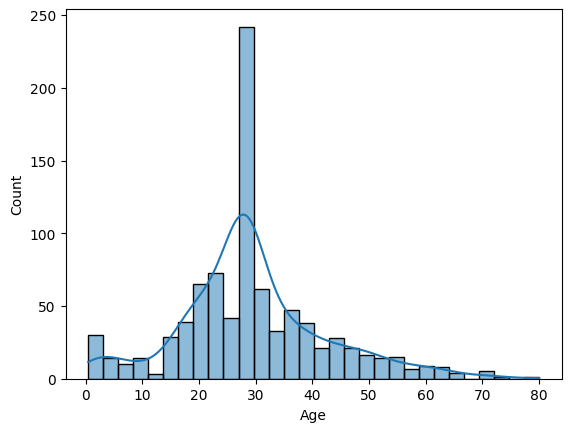

In [12]:
sns.histplot(df['Age'],kde=True)

In [13]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

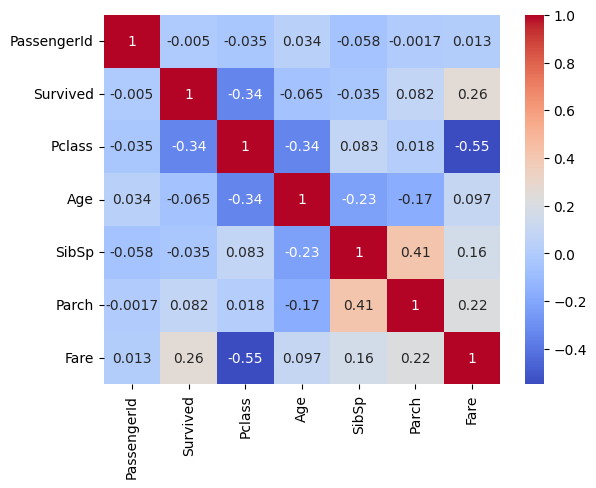

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

## 6. Feature Engineering
Creating new meaningful features and encoding categorical variables.


In [15]:
# Family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Encode gender
df["Sex"] = df["Sex"].map({"male":0, "female":1})
